In [1]:
import matplotlib.pyplot as plt 
import math

In [35]:
def ciz(baglantilar, pos, baslik):
    plt.figure(figsize=(5,5))
    for (a,b) in baglantilar:
        x1,y1 = pos[a]
        x2,y2 = pos[b]
        plt.plot([x1,x2],[y1,y2],'blue',linewidth=2)
    for node,(x,y) in pos.items():
        renk = "red" if "HUB" in node or "Switch" in node else "lightgreen"
        plt.scatter(x,y,s=2000,c=renk)
        plt.text(x,y,node,ha="center",va="center",fontsize=12,fontweight="bold")
    plt.title(baslik,fontsize=14)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

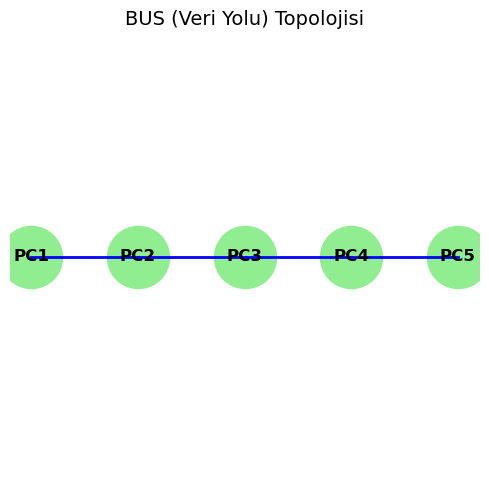

In [37]:
def bus_topoloji(n=5):
    nodelar = [f"PC{i+1}" for i in range(n)]   #bu kısımda nodelara ısımlerını verıyorum sırasıyla
    baglantilar = [(nodelar[i], nodelar[i+1]) for i in range(n-1)]  # dugumlerı bırbırlerıne baglıyorum p1-p2 p2-p3 seklınde
    pos = {nodelar[i]: (i*2, 0) for i in range(n)}  #dugumlerın konumları 0,0 1,0 2,0 bus oldugu ıcın 
    ciz(baglantilar, pos, "BUS (Veri Yolu) Topolojisi")

bus_topoloji()

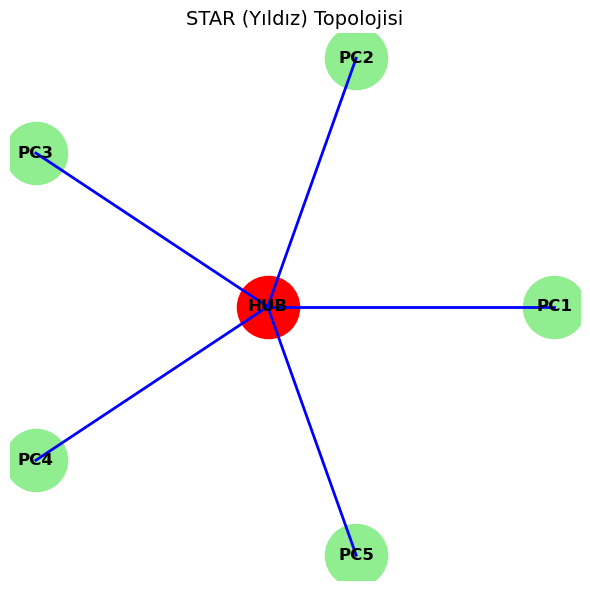

In [7]:
def star_topoloji(n=5):
    merkez = "HUB"
    nodelar = [f"PC{i+1}" for i in range(n)]
    baglantilar = [(merkez, node) for node in nodelar]
    pos = {merkez: (0,0)}
    aci_adimi = 360 / n
    for i,node in enumerate(nodelar):
        aci = math.radians(i * aci_adimi)
        pos[node] = (math.cos(aci)*3, math.sin(aci)*3)
    ciz(baglantilar, pos, "STAR (Yıldız) Topolojisi")

star_topoloji()

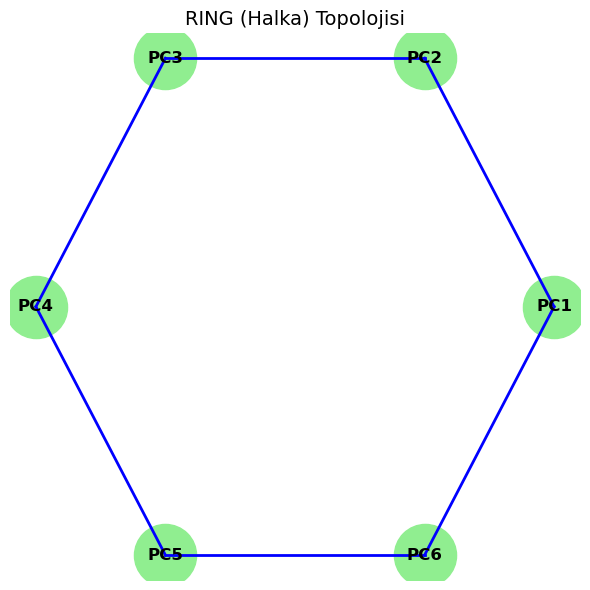

In [11]:
def ring_topoloji(n=6):
    nodelar = [f"PC{i+1}" for i in range(n)]
    baglantilar = [(nodelar[i], nodelar[(i+1)%n]) for i in range(n)]
    pos = {}
    aci_adimi = 360 / n
    for i,node in enumerate(nodelar):
        aci = math.radians(i * aci_adimi)
        pos[node] = (math.cos(aci)*3, math.sin(aci)*3)
    ciz(baglantilar, pos, "RING (Halka) Topolojisi")
ring_topoloji()

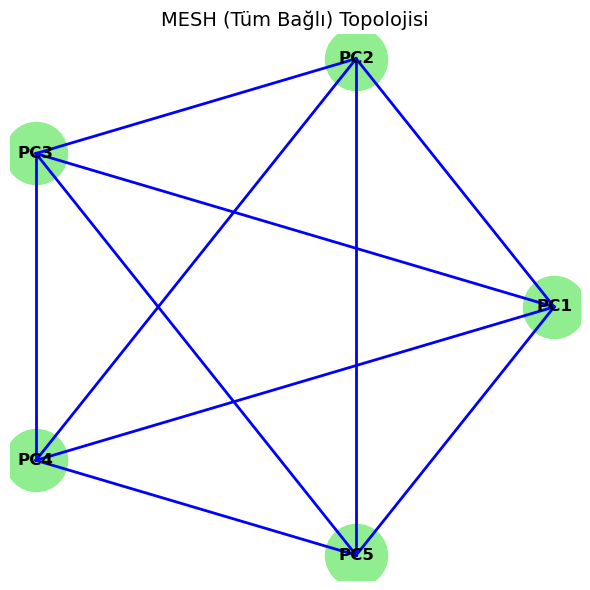

In [15]:
def mesh_topoloji(n=5):
    nodelar = [f"PC{i+1}" for i in range(n)]
    baglantilar = []
    for i in range(n):
        for j in range(i+1,n):
            baglantilar.append((nodelar[i], nodelar[j]))
    pos = {}
    aci_adimi = 360 / n
    for i,node in enumerate(nodelar):
        aci = math.radians(i * aci_adimi)
        pos[node] = (math.cos(aci)*3, math.sin(aci)*3)
    ciz(baglantilar, pos, "MESH (Tüm Bağlı) Topolojisi")
mesh_topoloji()

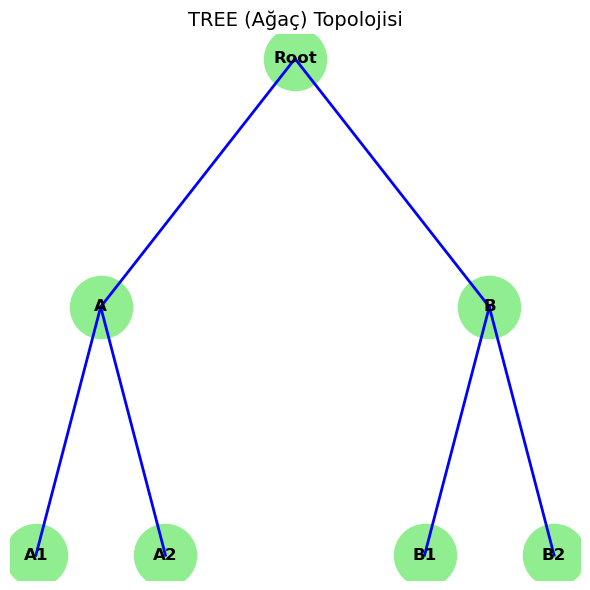

In [19]:
def tree_topoloji():
    # Basit 3 seviye ağaç yapısı
    pos = {
        "Root": (0,4),
        "A": (-3,2), "B": (3,2),
        "A1": (-4,0), "A2": (-2,0),
        "B1": (2,0), "B2": (4,0)
    }
    baglantilar = [
        ("Root","A"), ("Root","B"),
        ("A","A1"), ("A","A2"),
        ("B","B1"), ("B","B2")
    ]
    ciz(baglantilar, pos, "TREE (Ağaç) Topolojisi")
tree_topoloji()

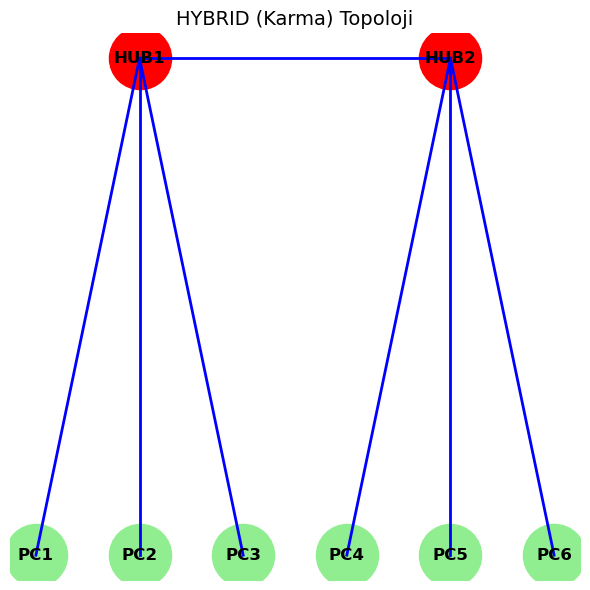

In [21]:
def hybrid_topoloji():
    # Yıldız + Bus karışımı
    pos = {
        "HUB1": (-3,2), "HUB2": (3,2),
        "PC1": (-5,0), "PC2": (-3,0), "PC3": (-1,0),
        "PC4": (1,0), "PC5": (3,0), "PC6": (5,0)
    }
    baglantilar = [
        ("HUB1","PC1"),("HUB1","PC2"),("HUB1","PC3"),
        ("HUB2","PC4"),("HUB2","PC5"),("HUB2","PC6"),
        ("HUB1","HUB2")
    ]
    ciz(baglantilar, pos, "HYBRID (Karma) Topoloji")
hybrid_topoloji()

In [39]:
import matplotlib.pyplot as plt


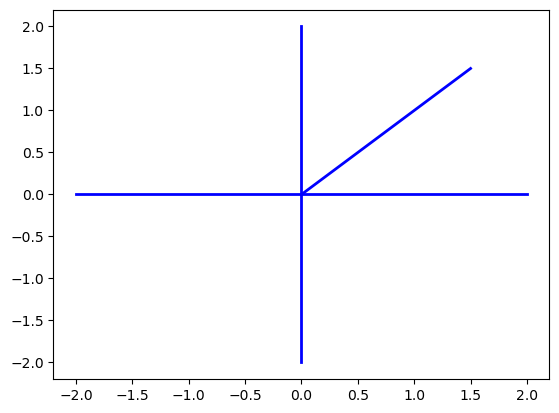

In [45]:
baglantilar = [("HUB", "PC1"), ("HUB", "PC2"), ("HUB", "PC3"), ("HUB", "PC4"), ("HUB", "PC5")]
konumlari = {
    "HUB": (0, 0),
    "PC1": (0, 2),
    "PC2": (2, 0),
    "PC3": (0, -2),
    "PC4": (-2, 0),
    "PC5": (1.5, 1.5)
}

for a,b in baglantilar:
    x1,y1=konumlari[a] # tek tek konumlarını x1 y1 seklınde arıyıyorum 
    x2,y2=konumlari[b]
    plt.plot([x1,x2],[y1,y2],"blue",linewidth=2)  #aradakı yolları çızıyorum
    
for isim, (x, y) in konumlari.items():   #ısımlerıyle bırlıkte sırasıyla 
    renk = 'red' if isim == "HUB" else 'lightgreen'
    plt.scatter(x, y, s=1000, color=renk)
    plt.text(x, y, isim, ha='center', va='center', fontsize=10, fontweight='bold') 
